In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('fivethirtyeight')
%matplotlib inline

## Classification Examples: Medicine

**Please run all cells before this cell, including the import cell at the top of the notebook.**

In [5]:
ckd = pd.read_csv('ckd.csv')
ckd = ckd.rename(columns={'Blood Glucose Random': 'Glucose'})
ckd

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell clumps,Bacteria,Glucose,...,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Class
0,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,1
1,53,90,1.020,2,0,abnormal,abnormal,present,notpresent,70,...,29,12100,3.7,yes,yes,no,poor,no,yes,1
2,63,70,1.010,3,0,abnormal,abnormal,present,notpresent,380,...,32,4500,3.8,yes,yes,no,poor,yes,no,1
3,68,80,1.010,3,2,normal,abnormal,present,present,157,...,16,11000,2.6,yes,yes,yes,poor,yes,no,1
4,61,80,1.015,2,0,abnormal,abnormal,notpresent,notpresent,173,...,24,9200,3.2,yes,yes,yes,poor,yes,yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,55,80,1.020,0,0,normal,normal,notpresent,notpresent,140,...,47,6700,4.9,no,no,no,good,no,no,0
154,42,70,1.025,0,0,normal,normal,notpresent,notpresent,75,...,54,7800,6.2,no,no,no,good,no,no,0
155,12,80,1.020,0,0,normal,normal,notpresent,notpresent,100,...,49,6600,5.4,no,no,no,good,no,no,0
156,17,60,1.025,0,0,normal,normal,notpresent,notpresent,114,...,51,7200,5.9,no,no,no,good,no,no,0


In [6]:
ckd_class = ckd.groupby(by='Class').aggregate({'Class': 'count'})
ckd_class = ckd_class.rename(columns={'Class': 'Count'})
ckd_class

,Count
Class,
0,115
1,43


In [7]:
ckd_w_g = ckd[['White Blood Cell Count', 'Glucose', 'Class']]
ckd_w_g_0 = ckd_w_g.groupby(by='Class').get_group((0))
ckd_w_g_1 = ckd_w_g.groupby(by='Class').get_group((1))

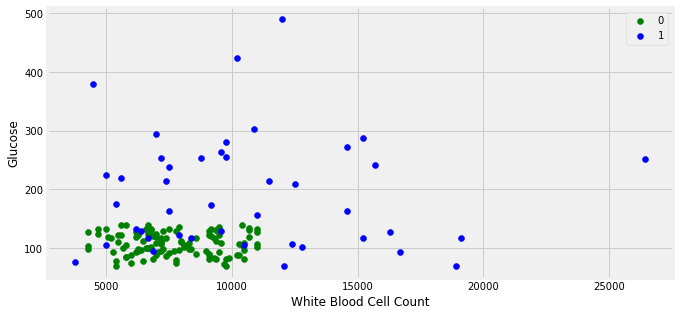

In [8]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(ckd_w_g_0['White Blood Cell Count'], ckd_w_g_0['Glucose'], c='green', label='0')
ax.scatter(ckd_w_g_1['White Blood Cell Count'], ckd_w_g_1['Glucose'], c='blue', label='1')
ax.legend()
ax.set_xlabel('White Blood Cell Count')
ax.set_ylabel('Glucose');

In [20]:
ckd_h_g = ckd[['Hemoglobin', 'Glucose', 'Class']]
ckd_h_g_0 = ckd_h_g.groupby(by='Class').get_group((0))
ckd_h_g_1 = ckd_h_g.groupby(by='Class').get_group((1))

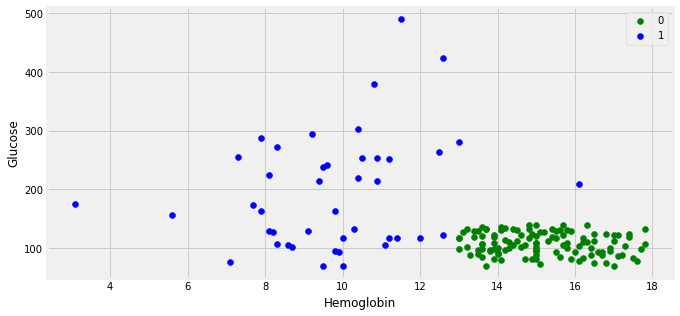

In [21]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(ckd_h_g_0['Hemoglobin'], ckd_w_g_0['Glucose'], c='green', label='0')
ax.scatter(ckd_h_g_1['Hemoglobin'], ckd_w_g_1['Glucose'], c='blue', label='1')
ax.legend()
ax.set_xlabel('Hemoglobin')
ax.set_ylabel('Glucose');

## Classification Examples: Counterfeit Banknotes

**Please run all cells before this cell, including the previous example cells and the import cell at the top of the notebook.**

In [10]:
banknotes = pd.read_csv('banknote.csv')
banknotes

,WaveletVar,WaveletSkew,WaveletCurt,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [12]:
bank_v_c_0 = banknotes.groupby(by='Class').get_group((0))
bank_v_c_1 = banknotes.groupby(by='Class').get_group((1))

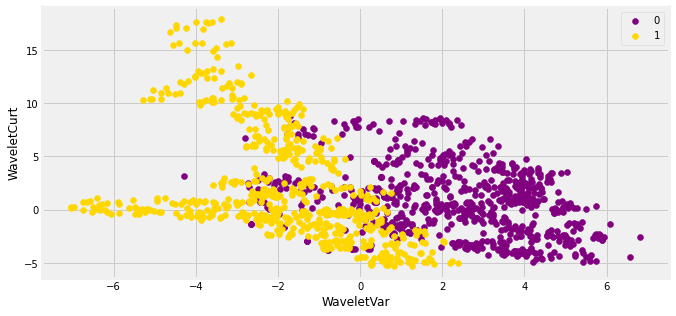

In [14]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(bank_v_c_0['WaveletVar'], bank_v_c_0['WaveletCurt'], c='purple', label='0')
ax.scatter(bank_v_c_1['WaveletVar'], bank_v_c_1['WaveletCurt'], c='gold', label='1')
ax.legend()
ax.set_xlabel('WaveletVar')
ax.set_ylabel('WaveletCurt');

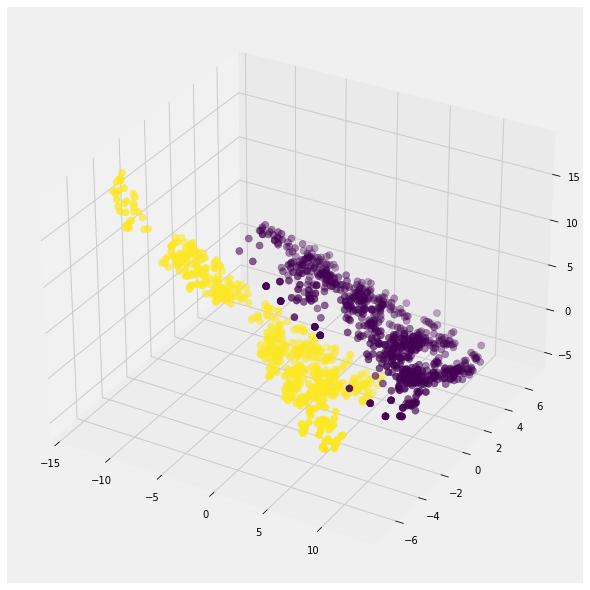

In [15]:
fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)
ax.scatter(banknotes['WaveletSkew'], 
           banknotes['WaveletVar'], 
           banknotes['WaveletCurt'], 
           c=banknotes['Class'],
           cmap='viridis',
           s=50);

**Conclusion:** looking at two variables at a time (scatter plot) might not reveal a clear separation in the classes but sometimes, all attributes considered together (three out of four in the above case) might reveal a much clearer separation. Not always possible to see visually, especially when the number of attributes is more than three. So, we develop generic algorithms instead of making such decisions by visually plotting the data. 